# GSE20680 Clustering
_Austin Szatrowski_

## Imports

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,pairwise_distances_argmin, pairwise_distances, jaccard_score
import seaborn as sns

In [43]:
gse20680_pca = pd.read_csv("GSE20680_scaled_projected.csv")

## Plot Clusters

In [44]:
gse20680_kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(gse20680_pca.loc[:,['PC1', 'PC2']])
gse20680_pca_clusters = gse20680_pca.join(pd.DataFrame(gse20680_kmeans.labels_, columns=['predicted_label']))

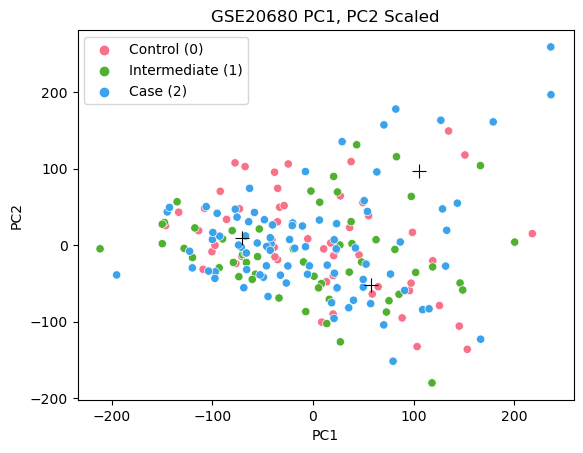

In [45]:
sns.scatterplot(x = gse20680_pca_clusters['PC1'],
                y = gse20680_pca_clusters['PC2'],
                hue=gse20680_pca_clusters['cad_status'],
                palette='husl')
sns.scatterplot(x=gse20680_kmeans.cluster_centers_[:, 0],
                y=gse20680_kmeans.cluster_centers_[:, 1],
                s=100,
                marker = "+",
                color = "black")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("GSE20680 PC1, PC2 Scaled")
plt.show()

## Assess Clustering